In [1]:
import warnings
warnings.filterwarnings('ignore')

### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

import pandas as pd

data = pd.read_csv('ks.csv')

data = data[data['Состояние'].isin(['successful', 'failed'])]

data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,successful,86,US,10030.88,10000.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,failed,0,US,0.00,10000.0


## EDA

In [2]:
from matplotlib import pyplot as plt

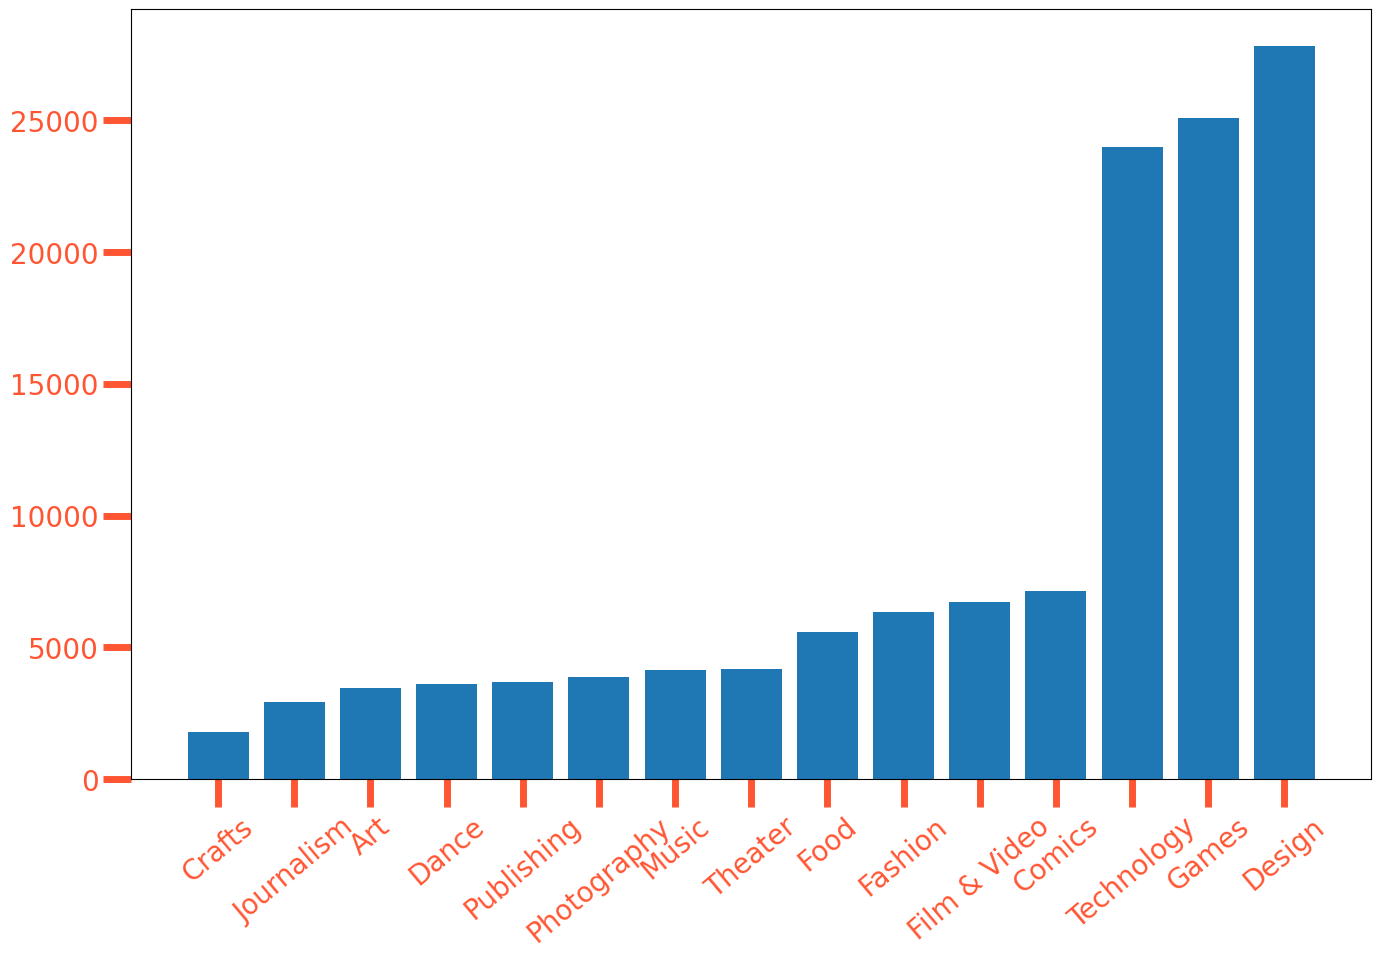

In [3]:
### Средний таргет по Главным категориям

main_category = data.groupby('Главная категория')['Собрано в долларах'].mean()
main_category = main_category.sort_values()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(main_category.index, main_category)
plt.xticks(rotation=40)

plt.show()

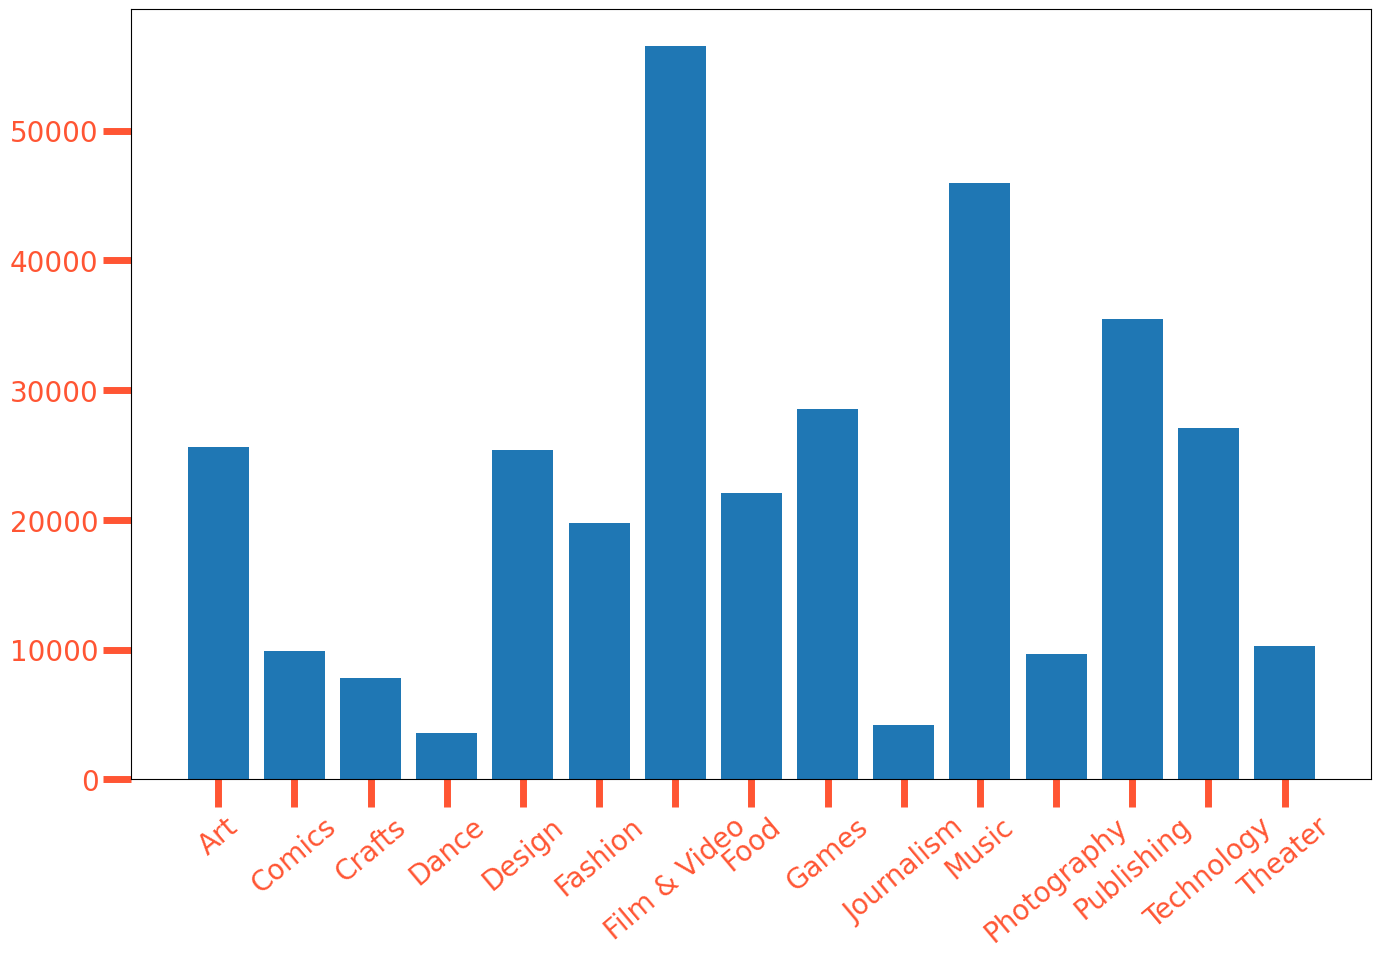

In [4]:
### Проверим количество наблюдений в нашей выборке


main_category_count = data.groupby('Главная категория')['Собрано в долларах'].count()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(main_category_count.index, main_category_count)
plt.xticks(rotation=40)

plt.show()

In [5]:
### Соберем словарь валюта:[значения]

currency_dict = {}

for currency in data['Валюта'].unique():
    
    currency_dict[currency] = data[data['Валюта']==currency]['Собрано в долларах']

In [6]:
currency_dict['USD']

0           600.00
3           502.00
4          2414.00
5         10030.88
6             0.00
            ...   
378654      505.00
378655    18808.00
378658        0.00
378659      200.00
378660     4847.00
Name: Собрано в долларах, Length: 261511, dtype: float64

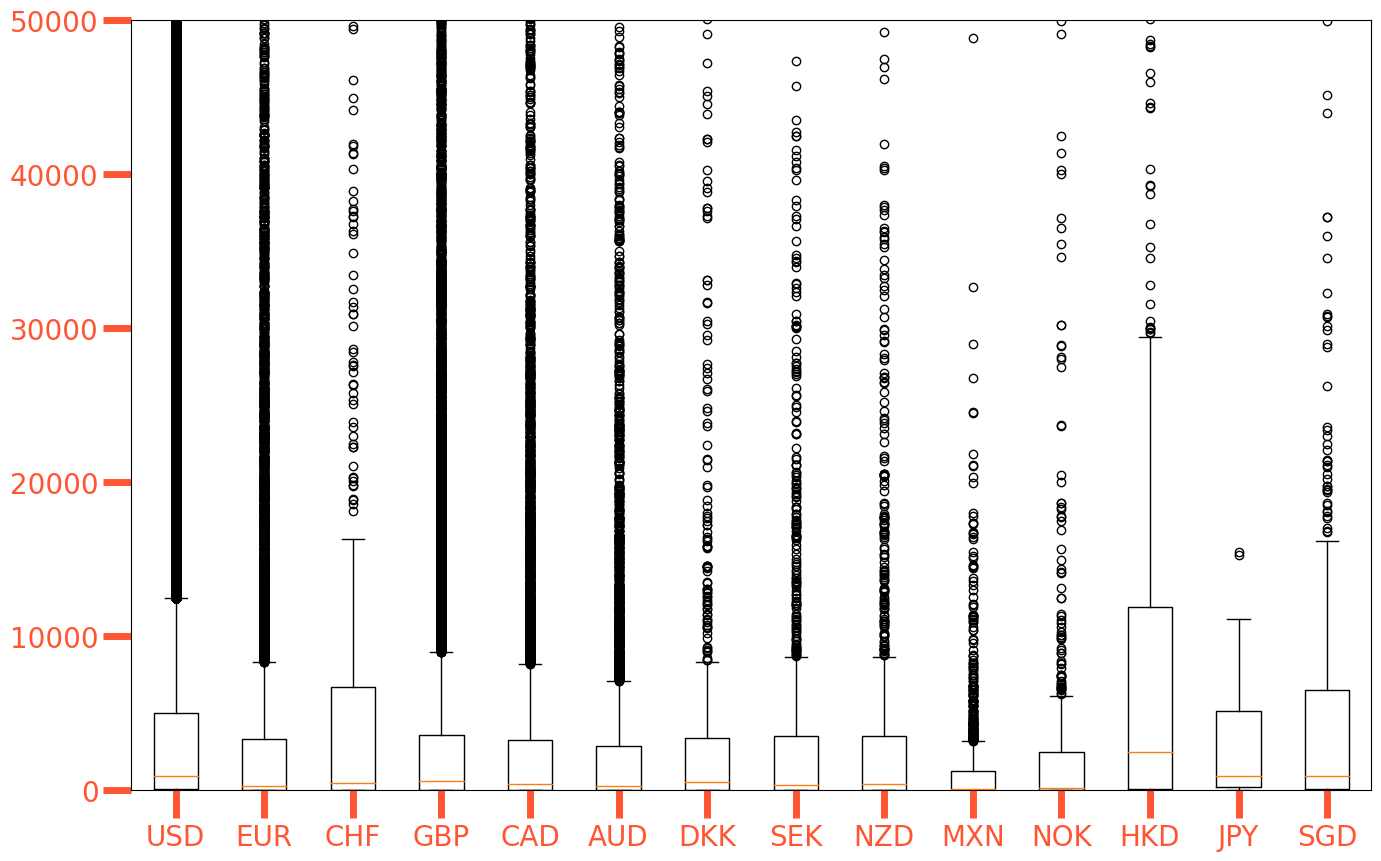

In [7]:
### Нарисуем ящики с усами для всех категорий валюты


fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot(currency_dict.values(),
            labels=currency_dict.keys())

plt.ylim((0, 50000))

plt.show()



## Встроенные алгоритмы

In [8]:
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'x.csv'

In [ ]:
x.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.0,39,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.0,87,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.0,8,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.0,79,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.0,28,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,таргет2
0,625.0
1,22.0
2,35.0
3,145.0
4,387.0


In [ ]:
### Построим Lasso регрессию

from sklearn.linear_model import Lasso

model = Lasso(alpha=15)
model.fit(x, y)








Lasso(alpha=15)

In [ ]:
model.coef_

array([ 5.88520641e-02, -1.01091107e-04, -2.43668284e+01,  1.20841180e+03,
       -0.00000000e+00,  1.32398969e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  8.65177065e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  5.78301662e+02, -2.58692912e+02,  1.57828459e+03,
       -0.00000000e+00, -1.57739077e+02, -0.00000000e+00, -3.77308850e+01,
       -0.00000000e+00,  2.04956914e+02, -0.00000000e+00,  8.33549341e+02,
        0.00000000e+00,  1.50684077e+02, -0.00000000e+00,  9.22184112e+02])

## Методы обертки

In [ ]:
### Сколкьо признаков всего?
x.shape

(331675, 32)

In [ ]:
### Начнем с метода прямого отбора

from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=10)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
### Получим булевый список из включенных и выключенных признаков
sfs.get_support()

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False])

In [ ]:
### Или названия колонок
sfs.get_feature_names_out()

array(['Срок', 'Год публикации', 'CHF', 'DKK', 'NOK', 'Art', 'Dance',
       'Fashion', 'Film & Video', 'Journalism'], dtype=object)

In [ ]:
x[sfs.get_feature_names_out()]

,Срок,Год публикации,CHF,DKK,NOK,Art,Dance,Fashion,Film & Video,Journalism
0,39,2009,0,0,0,0,0,1,0,0
1,87,2009,0,0,0,0,0,0,1,0
2,8,2009,0,0,0,1,0,0,0,0
3,79,2009,0,0,0,0,0,0,0,0
4,28,2009,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
331670,2,2017,0,0,0,0,0,0,0,0
331671,4,2017,0,0,0,0,0,0,0,0
331672,3,2017,0,0,0,0,0,1,0,0
331673,1,2017,0,0,0,0,0,0,0,0


In [ ]:
### Соответственно, метод обратного отбора

sfs = SequentialFeatureSelector(model, 
                                n_features_to_select=27,
                                direction='backward')
sfs.fit(x, y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=27)

In [ ]:
sfs.get_feature_names_out().shape

(27,)

## Методы фильтрации

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
### Построим матрицу корреляций признаков между собой и с таргетом

pd.concat((x, y), axis=1).corr()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater,таргет2
Категория,1.000000,0.005367,-0.002476,0.139622,-0.000953,0.025261,0.014993,0.008114,0.064460,0.007239,0.046723,0.004149,-0.005995,-0.000226,0.007825,0.003823,0.020777,-0.064935,-0.153844,-0.042659,-0.103867,-0.052742,0.422252,-0.074223,-0.120246,-0.095730,-0.063836,-0.190489,-0.086241,-0.176827,0.343178,-0.085420,0.009864
Цель в долларах,0.005367,1.000000,0.021607,0.012320,-0.000066,0.000584,0.010613,-0.000962,0.005738,-0.000631,-0.000592,-0.000215,-0.001605,0.000099,-0.000977,-0.000168,-0.000889,-0.003774,-0.000542,-0.003368,-0.004421,-0.003122,-0.000849,-0.004456,0.014136,0.001602,0.002902,-0.009798,-0.004757,-0.007476,0.015200,-0.002958,-0.000945
Срок,-0.002476,0.021607,1.000000,-0.171189,-0.000562,-0.000709,0.004746,-0.003698,0.012850,-0.054041,0.000385,-0.003417,0.013080,0.002672,-0.012681,-0.003603,-0.005289,0.035063,-0.036935,-0.001492,-0.030644,-0.009370,0.004161,-0.026564,0.037582,-0.001235,0.002608,0.042324,-0.006003,-0.006150,0.030692,-0.009011,-0.007307
Год публикации,0.139622,0.012320,-0.171189,1.000000,0.002280,0.096694,0.044651,0.040027,0.190483,0.118493,0.051222,0.012162,0.089462,0.031467,0.034145,0.053282,0.048748,-0.300112,-0.018284,0.023772,0.064767,-0.024960,0.090585,0.073451,-0.159839,0.050954,0.021174,-0.142469,-0.022634,-0.005267,0.135133,-0.065796,0.025158
Close_brent,-0.000953,-0.000066,-0.000562,0.002280,1.000000,-0.000476,-0.000107,-0.000128,0.004390,-0.000756,-0.000092,-0.000020,-0.000158,-0.000102,-0.000150,-0.000164,-0.000090,-0.001193,-0.000700,-0.000424,-0.000376,-0.000252,-0.000696,0.005389,-0.001097,-0.000646,-0.000272,-0.000970,-0.000420,0.002396,-0.000721,-0.000432,0.000015
CAD,0.025261,0.000584,-0.000709,0.096694,-0.000476,1.000000,-0.008737,-0.010434,-0.041907,-0.061484,-0.007471,-0.001639,-0.012868,-0.008268,-0.012225,-0.013314,-0.007289,-0.380068,-0.001172,0.009775,0.007582,-0.007753,0.013688,0.010157,-0.026192,0.004543,0.004179,-0.031147,-0.001653,0.000542,0.031432,-0.018772,0.004756
CHF,0.014993,0.010613,0.004746,0.044651,-0.000107,-0.008737,1.000000,-0.002352,-0.009447,-0.013861,-0.001684,-0.000370,-0.002901,-0.001864,-0.002756,-0.003001,-0.001643,-0.085681,-0.001632,-0.005373,0.001629,-0.002653,0.016429,0.004923,-0.012151,-0.000097,-0.002545,-0.008734,-0.002848,-0.008081,0.027563,-0.005955,-0.000580
DKK,0.008114,-0.000962,-0.003698,0.040027,-0.000128,-0.010434,-0.002352,1.000000,-0.011282,-0.016552,-0.002011,-0.000441,-0.003464,-0.002226,-0.003291,-0.003584,-0.001962,-0.102317,0.000039,-0.005594,0.001167,-0.003873,0.015662,0.003038,-0.009153,-0.002467,0.003788,-0.006061,-0.002079,-0.004853,0.016308,-0.003195,-0.001121
EUR,0.064460,0.005738,0.012850,0.190483,0.004390,-0.041907,-0.009447,-0.011282,1.000000,-0.066482,-0.008079,-0.001773,-0.013914,-0.008940,-0.013218,-0.014396,-0.007881,-0.410964,-0.010340,-0.021357,-0.001260,-0.012318,0.033175,0.020744,-0.049275,-0.005885,0.008145,-0.042165,0.014769,-0.022980,0.090361,-0.027643,0.003462
GBP,0.007239,-0.000631,-0.054041,0.118493,-0.000756,-0.061484,-0.013861,-0.016552,-0.066482,1.000000,-0.011852,-0.002601,-0.020414,-0.013117,-0.019393,-0.021121,-0.011563,-0.602942,0.005803,-0.005850,0.006929,-0.005495,0.001670,0.012198,0.005507,-0.022197,0.001647,-0.048260,0.015663,-0.007888,0.003835,0.039247,0.004429


In [ ]:
### Оставим только небинарные колонки

cols_to_check=['Цель в долларах', 'Срок', 
               'Close_brent', 'Год публикации']

In [ ]:
### Построим для них матрицу корреляций
df = pd.concat((x[cols_to_check], y), axis=1).corr()

In [ ]:
df

,Цель в долларах,Срок,Close_brent,Год публикации,таргет2
Цель в долларах,1.000000,0.021607,-0.000066,0.012320,-0.000945
Срок,0.021607,1.000000,-0.000562,-0.171189,-0.007307
Close_brent,-0.000066,-0.000562,1.000000,0.002280,0.000015
Год публикации,0.012320,-0.171189,0.002280,1.000000,0.025158
таргет2,-0.000945,-0.007307,0.000015,0.025158,1.000000


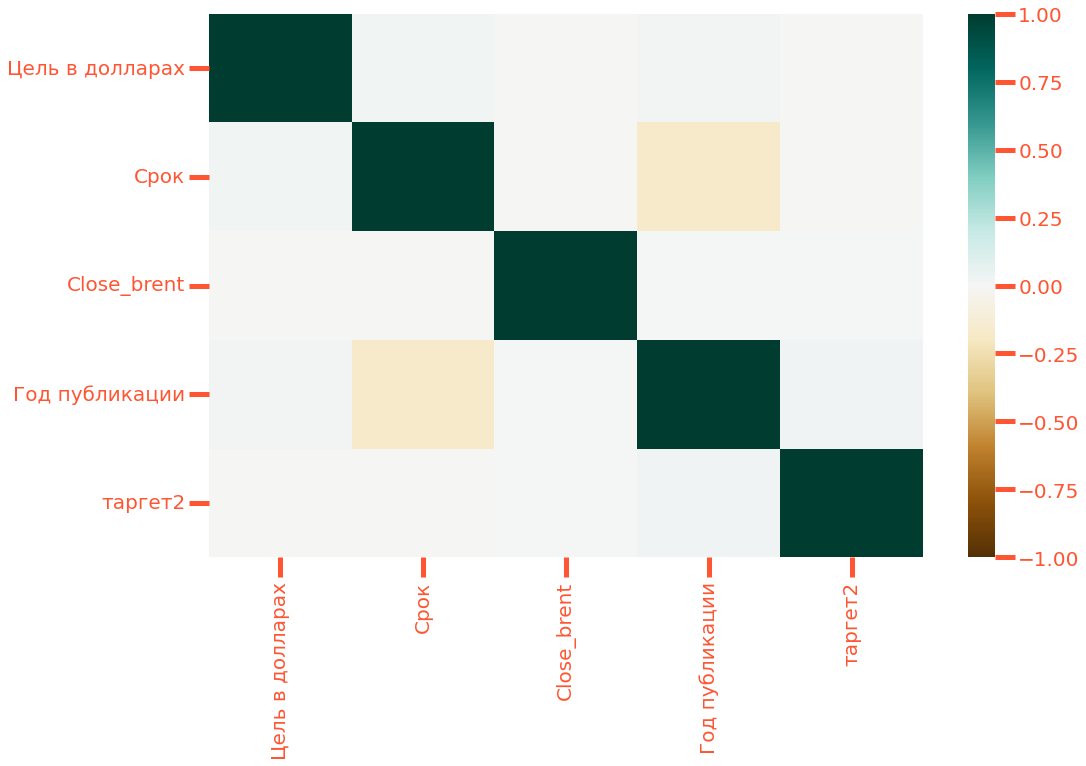

In [ ]:
### Изобразим в виде Тепловой карты

import seaborn as sns 

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(df,
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='BrBG',
            vmin=-1,
            vmax=+1)

plt.show()

In [ ]:
### Найдем, есть ли у нас константные (или квазиконстантные) колонки

from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold=1)
variance.fit(x)

VarianceThreshold(threshold=1)

In [ ]:
x.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.0,39,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.0,87,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.0,8,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.0,79,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.0,28,2009,34.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
variance.get_feature_names_out()

array(['Категория', 'Цель в долларах', 'Срок', 'Год публикации'],
      dtype=object)

In [ ]:
### Осторожно с бинарными признаками!